In [1]:
%matplotlib inline

import os, sys
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

sys.path.append("../pycommon")
from pps_tools import set_cartopy_gridlines, set_cartopy_colorbar


 

In [2]:
%ls nudging_utils

OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc
OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc.html
SMAP_L2B_SSS_36950_20220101T005200_R18240_V5.0.h5
SMAP_L3_SSS_20220105_8DAYS_V5.0.nc
WOA05_pottemp_salt.nc
flood_salt_restore_PHC2.1440x1080.v20180405.nc
iced_ocean_topog2.nc
ocean_static.nc
ocean_topog.nc


In [5]:
# read in the output grid & the land/ocean mask

fn_grd_out = 'nudging_utils/flood_salt_restore_PHC2.1440x1080.v20180405.nc'
f = Dataset(fn_grd_out)
lat2d_grd_out = f.variables['lat'][:]
lon2d_grd_out = f.variables['lon'][:]
sss_grd_out = f.variables['SALT'][:]
f.close()


fn_mask = 'nudging_utils/ocean_topog.nc'
f = Dataset(fn_mask)
wet_grd_out = f.variables['wet'][:]
f.close()


print("lat2d_grd_out: shape, min, max=",lat2d_grd_out.shape, np.min(lat2d_grd_out), np.max(lat2d_grd_out))
print("lon2d_grd_out: shape, min, max=",lon2d_grd_out.shape, np.min(lon2d_grd_out), np.max(lon2d_grd_out))
print("sss: shape, min, max=",sss_grd_out.shape, np.min(sss_grd_out), np.max(sss_grd_out))
print("sss: shape, min, max=",wet_grd_out.shape, np.min(wet_grd_out), np.max(wet_grd_out))




lat2d_grd_out: shape, min, max= (1080, 1440) -81.60305 89.93877
lon2d_grd_out: shape, min, max= (1080, 1440) -299.99948 60.03369
sss: shape, min, max= (12, 1080, 1440) 3.297 41.3968
sss: shape, min, max= (1080, 1440) 0.0 1.0


Text(0.5, 1.0, 'SSS (unit: psu)')

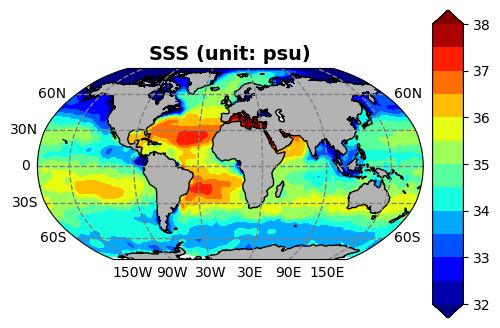

In [7]:
# plot the output SSS fields with land masked out

fig  = plt.figure(figsize=(6,4))

ax   = fig.add_subplot(111,projection=ccrs.Robinson())
crs = ccrs.PlateCarree()

sss_1mon = sss_grd_out[0,:,:]
sss_1mon[wet_grd_out<1] = np.nan
    

surf = ax.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
#surf = ax.contourf(lon2d, lat2d, sss[:,:], extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax,surf,fig,shrink=1)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax,crs=crs)

ax.set_title('SSS (unit: psu)',fontsize=14,fontweight='heavy')


In [46]:
# Read in the input Level-4 SSS fields

#fn_grd_in = 'nudging_utils/OISSS_L4_multimission_global_monthly_v1.0_2014-01.nc'
fn_grd_in = 'nudging_utils/OISSS_L4_multimission_global_monthly_v1.0_2021-02.nc'
f = Dataset(fn_grd_in)
lat1d_grd_in = f.variables['latitude'][:]
lon1d_grd_in = f.variables['longitude'][:]
sss_grd_in = np.squeeze(f.variables['sss'][:])
sss_clim_grd_in = np.squeeze(f.variables['sss_climatology'][:])

f.close()

lon2d_grd_in, lat2d_grd_in = np.meshgrid(lon1d_grd_in, lat1d_grd_in)

print("lat2d_grd_in: shape, min, max=",lat2d_grd_in.shape, np.min(lat2d_grd_in), np.max(lat2d_grd_in))
print("lon2d_grd_in: shape, min, max=",lon2d_grd_in.shape, np.min(lon2d_grd_in), np.max(lon2d_grd_in))
print("sss_grd_in: shape, min, max=",sss_grd_in.shape, np.min(sss_grd_in), np.max(sss_grd_in))



lat2d_grd_in: shape, min, max= (720, 1440) -89.875 89.875
lon2d_grd_in: shape, min, max= (720, 1440) -179.875 179.875
sss_grd_in: shape, min, max= (720, 1440) 28.72791 37.60571


Text(0.5, 1.0, 'L4 monthly OISSS (unit: psu)')

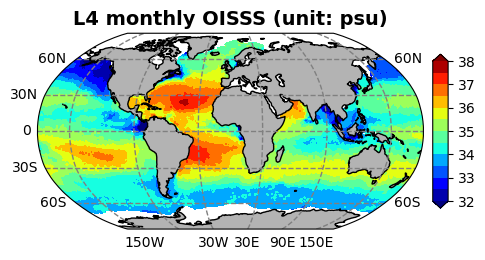

In [47]:
# Plot the input Level-3 SSS fields

fig2  = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111,projection=ccrs.Robinson())
crs=ccrs.PlateCarree()

surf2 = ax2.contourf(lon2d_grd_in, lat2d_grd_in, sss_grd_in, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)

set_cartopy_colorbar(ax2,surf2,fig2,shrink=0.5)

ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax2,crs=crs)

ax2.set_title('L4 monthly OISSS (unit: psu)',fontsize=14,fontweight='heavy')

Text(0.5, 1.0, 'L4 monthly OISSS from 09/2011 to 08/2021 (unit: psu)')

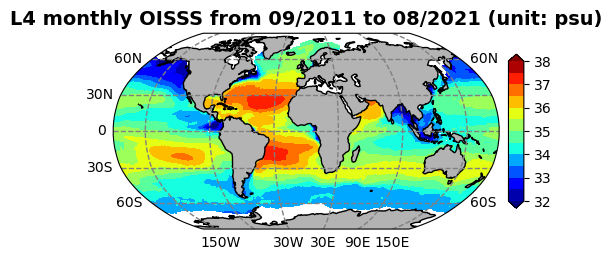

In [48]:
# Plot the input Level-3 SSS_Climatology fields

fig2_2  = plt.figure(figsize=(6,4))
ax2_2 = fig2_2.add_subplot(111,projection=ccrs.Robinson())
crs=ccrs.PlateCarree()

surf2_2 = ax2_2.contourf(lon2d_grd_in, lat2d_grd_in, sss_clim_grd_in, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)

set_cartopy_colorbar(ax2_2,surf2_2,fig2_2,shrink=0.5)

ax2_2.add_feature(cfeature.COASTLINE)
ax2_2.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax2_2,crs=crs)

ax2_2.set_title('L4 monthly OISSS from 09/2011 to 08/2021 (unit: psu)',fontsize=14,fontweight='heavy')


In [22]:
type(sss_grd_in[0,0])
sss_grd_in[0,0]

masked

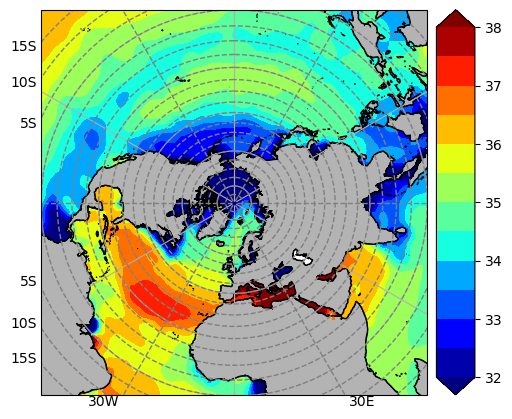

In [36]:
# show SSS of the original relaxation file in the polar region
fig6 = plt.figure(figsize=(6, 5))
ax6 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(linewidth=0.75, color='black', resolution='50m')
ax6.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax6.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
crs = ccrs.PlateCarree()

surf6 = ax6.contourf(lon2d_grd_out, lat2d_grd_out, sss_1mon, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
#surf = ax.contourf(lon2d, lat2d, sss[:,:], extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax6,surf6,fig6,shrink=1)

ax6.add_feature(cfeature.COASTLINE)
ax6.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax6,crs=crs,ytick=np.arange(-90,90+10,5))






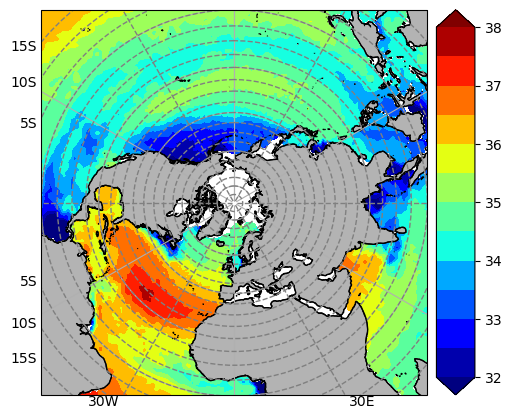

In [49]:
# show L4 OISSS in the polar region
fig7 = plt.figure(figsize=(6, 5))
ax7 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs = ccrs.PlateCarree()

ax7.coastlines(linewidth=0.75, color='black', resolution='50m')
ax7.gridlines(crs=crs, linestyle='-')
ax7.set_extent([-180, 180, 0, 90], crs=crs)

surf7 = ax7.contourf(lon2d_grd_in, lat2d_grd_in, sss_grd_in, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax7,surf7,fig7,shrink=1)

ax7.add_feature(cfeature.COASTLINE)
ax7.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax7,crs=crs,ytick=np.arange(-90,90+10,5))


In [50]:
# start to regrid SSS using xesmf

import xesmf as xe
grd_in = {"lon": lon1d_grd_in, "lat": lat1d_grd_in}
grd_out = {"lon": lon2d_grd_out, "lat": lat2d_grd_out}

inputRegridder = True
fnRegridder = "bilinear_720x1440_1080x1440.nc"
if inputRegridder: # directly read interpolation weights from the file
    regridder = xe.Regridder(grd_in, grd_out, "bilinear", weights=fnRegridder)
else: # generate interpolation weights online
    regridder = xe.Regridder(grd_in, grd_out, "bilinear")

In [51]:
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_720x1440_1080x1440.nc 
Reuse pre-computed weights? False 
Input grid shape:           (720, 1440) 
Output grid shape:          (1080, 1440) 
Periodic in longitude?      False

In [52]:
# generate regridder in NetCDF
outputRegridder=False
if outputRegridder:
    regridder.to_netcdf()

In [53]:
print(sss_grd_in[0,0])
#print(sss_grd_in.fill_value)
cp = sss_grd_in.copy()

print(cp[1,0])
cp[cp.mask] = np.nan
cp.mask = False
print(cp[1,0])
cp.fill_value = 0

--
--
nan


In [54]:
remapped_grd_out = regridder(cp)
remapped_grd_out.shape


(1080, 1440)

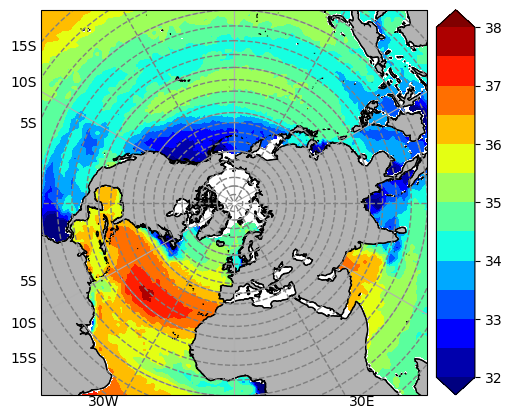

In [55]:
# show remapped tripolar grids in the polar region
fig8 = plt.figure(figsize=(6, 5))
ax8 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
crs = ccrs.PlateCarree()

ax8.coastlines(linewidth=0.75, color='black', resolution='50m')
ax8.gridlines(crs=crs, linestyle='-')
ax8.set_extent([-180, 180, 0, 90], crs=crs)

surf8 = ax8.contourf(lon2d_grd_out, lat2d_grd_out, remapped_grd_out, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax8,surf8,fig8,shrink=1)

ax8.add_feature(cfeature.COASTLINE)
ax8.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax8,crs=crs,ytick=np.arange(-90,90+10,5))


Text(0.5, 1.0, 'remapped L4 OISSS onto tripolar grids')

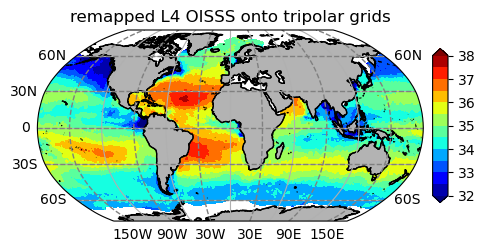

In [56]:
# show tripolar grids in the polar region
fig9 = plt.figure(figsize=(6, 4))
ax9 = plt.axes(projection=ccrs.Robinson())
crs = ccrs.PlateCarree()

ax9.coastlines(linewidth=0.75, color='black', resolution='50m')
ax9.gridlines(crs=crs, linestyle='-')
#ax9.set_extent([-180, 180, -90, 90], crs=crs)

surf9 = ax9.contourf(lon2d_grd_out, lat2d_grd_out, remapped_grd_out, levels=np.arange(32,38.5,0.5), extend="both", cmap=plt.cm.jet, transform=crs)
set_cartopy_colorbar(ax9,surf9,fig9,shrink=0.5)

ax9.add_feature(cfeature.COASTLINE)
ax9.add_feature(cfeature.LAND, facecolor=[0.7,0.7,0.7])
set_cartopy_gridlines(ax=ax9,crs=crs,ytick=np.arange(-90,90+10,30))
ax9.set_title("remapped L4 OISSS onto tripolar grids")

In [38]:
# How to fill the missing data in L4
# 1. Temporal interpolation the monthly dataset before and after (sss_t = 0.5*(sss_{t-1} + sss_{t+1})
# 2. Reuse the interpolation grids 